In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
from sklearn.model_selection import train_test_split
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
#plt.style.use('seaborn-white')
from sklearn.model_selection import GridSearchCV

In [2]:
dataframe = pd.read_csv("train.csv")

In [3]:
total_male_words = []
total_female_words = []
dominant = []
lead_list = list(dataframe["Lead"])
lead_words = list(dataframe["Number of words lead"])
male_words = list(dataframe["Number words male"])
female_words = list(dataframe["Number words female"])
for i in range(len(lead_list)):
    if lead_list[i] == 'Male':
        total_male_words.append(lead_words[i]+male_words[i])
        total_female_words.append(female_words[i])
    else:
        total_female_words.append(lead_words[i]+female_words[i])
        total_male_words.append(male_words[i])
dataframe["total_male_words"] = total_male_words
dataframe["total_female_words"] = total_female_words


for i in range(len(lead_list)):
    if total_male_words[i]>total_female_words[i]:
        dominant.append(1)
    else:
        dominant.append(0)
dataframe["dominant"] = dominant 

dataframe.head()


,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead,total_male_words,total_female_words,dominant
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female,2631.0,3763.0,0
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male,7256.0,1524.0,1
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male,4021.0,155.0,1
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male,8782.0,1073.0,1
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male,6371.0,1317.0,1


In [4]:
train, test = train_test_split(dataframe, test_size=0.3,shuffle=False)
X_train=train[['total_male_words', 'total_female_words','dominant']] #'Total words','Year',,'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'
Y_train = train[['Lead']].values.ravel()


X_test=test[['total_male_words', 'total_female_words','dominant']] #'Total words','Year',,'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'
Y_test = test[['Lead']].values.ravel()


In [5]:
#hyperparameter tuning
parameters = {
    'reg_param': (0.000001,0.00001, 0.0001, 0.001,0.01, 0.1),
#     'store_covariance': (True, False),
#     'tol': (0.0001, 0.001,0.01, 0.1), 
                   }

In [6]:
acc_l=[]
for i in range(2,25):
    model =GridSearchCV(
    estimator=skl_da.QuadraticDiscriminantAnalysis(),
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = i
    ) 
    res=model.fit(X=X_train, y=Y_train)
    acc_l.append((res.best_score_ )*100)
print(max(acc_l))
print(acc_l.index(max(acc_l))) 
model1 =GridSearchCV(
    estimator=skl_da.QuadraticDiscriminantAnalysis(),
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = acc_l.index(max(acc_l))
    ) 
res=model1.fit(X_train, Y_train)

predict_prob = model1.predict_proba(X_test)
prediction = np.empty(len(X_test), dtype=object)
prediction = np.where(predict_prob[:, 0]>=0.5, 'Female', 'Male')
print('Accuracy:', (np.mean(prediction == Y_test))*100, '%')


88.73549419767906
19
Accuracy: 88.78205128205127 %


In [7]:
res.best_params_

{'reg_param': 1e-06}

In [8]:
#naive classifier

print('Accuracy:')
print('Accuracy:', np.mean(Y_test == 'Male') * 100)

Accuracy:
Accuracy: 69.23076923076923


/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


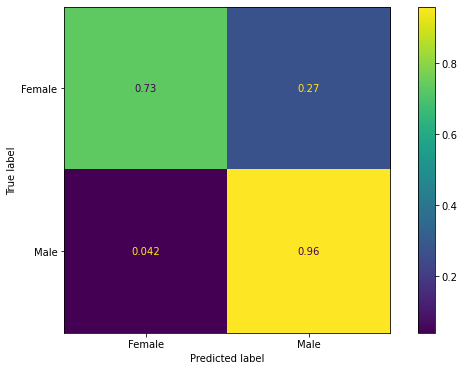

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test,normalize='true')

In [10]:
predict_prob = model.predict_proba(X_test)
prediction = np.empty(len(X_test), dtype=object)
prediction = np.where(predict_prob[:, 0]>=0.5, 'Female', 'Male')

print(classification_report(Y_test,prediction)) #np.concatenate(Y_test.to_numpy())



              precision    recall  f1-score   support

      Female       0.89      0.73      0.80        96
        Male       0.89      0.96      0.92       216

    accuracy                           0.89       312
   macro avg       0.89      0.84      0.86       312
weighted avg       0.89      0.89      0.88       312

